# Programming for Data Analytics - Project 2020

Author: Sheldon D'Souza; Email: G00387857@gmit.ie
***


## Project Objective:

The objectives of this project are as follows:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook

## Project Plan

- Decide on real-world phenomenon
- Identify dependent and independent variables for the phenomenon
- Research the variables and the data surrounding these variables
- Research the attributes and distributions of the variables
- Research the interdependencies between the variables
- Research generating the dataset using python taking into account the interdependencies
- Generate the dataset

## Scratchpad - to be deleted on the completion of the project

- Ideas
    - Impact on Avg Blood Glucose of carbohydrates, bmi, exercise, glycemic index
    - Impact on starting salary of experience, qualification, certifications, training etc.
    - Impact on Life Expectancy of various factors
    - Average Domestic Electricity Consummption - BER Rating (Insulation), Size of the house (depends on year of construction), Average occupancy (number of occupants and time spent at home), Time of year (Outside Temperature and Number of hours of Daylight - Depends on the season)

## Dataset to explored and generated


### Scope of the project

The scope of the data I will explore is the factors which impact the average monthly domestic electricity consumption of a household in Dublin. Some of the data (where relevant) will be extrapolated or inferred from national or international statistics and where I have made these assumptions, I will make this clear in the relevant section.

### Dataset

 The variables which I will explore are as follows:

- Average monthly electricity consumption for a household

- BER Rating of the house 

- Size of the house

- Year of construction of the house (Baked-in into the BER as average across years of construction taken)


- Average occupancy (number of occupants (Poisson distribution) x average time spent at home)


https://www.researchgate.net/publication/226081704_Household_size_and_the_Poisson_distribution

https://data.cso.ie/table/E1012


- Temperature (Normal Distribution)

- Number of hours of Daylight - for simplicity simple to take monthly average and use the same function as for BER
- Season of the year - Uniform distribution - slight variations?


We will explore each of the variables in the sections below:

#### Average monthly electicity consumption

Datatype: This will be a numeric variable which will be denoted in Kilowatt hours (kWh). This will be a determined by a algorithim based on the dependent variables, as described in the sections below.




##### BER Rating of a house

Datatype: This is a categorical variable ranging from A to F. Certain categories have further sub-divisions, most notably C1 C2 and C3. 

Note that the data for the the kWh/m2/annum has been given in 

##### What is BER

>Building Energy Rating (BER) certificates were introduced in Ireland in 2007, as required under the Energy Performance in Buildings Directive. The purpose of a BER is to make the energy performance of a dwelling visible and comparable to other dwellings on a like for like basis, allowing buyers and tenants to consider energy performance when deciding to purchase or rent a building. To do this the BER rates the theoretical energy performance of a dwelling, assigning it a rating from A1-G based on a calculation of the primary energy consumption in kWh per metre squared per year under standard conditions. Therefore a BER is similar to the energy rating on appliances, with A rated homes being the most energy efficient (and likely to have lower energy bills) and G rated homes being the least energy-efficient. The most efficient rating is an “A1” rating, which represents annual energy consumption of less than 25 kWh/m2., as illustrated in the table below:
>

#### Primary Energy Consumption of bands on the BER scale.

>
| BER Grade | A1 | A2 | A3 | B1 | B2 | B3 | C1 | C2 | C3 | D1 | D2 | E1 | E2 | F | G |
|:--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Primary Energy kWh/m2/annum | <25 | >25 | >50 | >75 | >100 | >125 | >150 | >175 | >200 | >225 | >260 | >300 | >340 | >380 | >450 |

>Source: SEAI
>
> Reference: https://www.seai.ie/publications/Energy-in-the-Residential-Sector-2018-Final.pdf


I have made a few assumtions to re-organise the above data to make it fit for purpose:
1. I have merged the three A categories (A1, A2, and A3) together as the actual distribution of BER rating from the Central Statistics Office (CSO) does not distinuguish between these categories and therefore for compratbility purposes I have taken the three as one category A
2. I have taken the mid range of each category and resdesigned the table accordingly
3. I have assumed that the distribution of the consumption is evenly spread throughout the year
4. In light of assumption 3 above. I have increased or decreased the kWh/m2/annum for each BER rating based on a number of factors such as Average occupancy (number of occupants x average time spent at home), Temperature, Number of hours of Daylight and Season of the year.

| BER Grade | Consumption Range | Mean Consumption |
|--- | --- | --- |
| A | 0 - 75 | 37.50 |
| B1 | 75 - 100 | 87.50 |
| B2 | 100 - 125 | 112.50 |
| B3 | 125 - 150 | 137.50 |
| C1 | 150 - 175 | 162.50 |
| C2 | 175 - 200 | 187.50 |
| C3 | 200 - 225 | 212.50 |
| D1 | 225 - 260 | 242.50 |
| D2 | 260 - 300 | 280 |
| E1 | 300 - 340 | 320 |
| F | 340 - 380 | 360 |
| G | 380 - 440 | 410 |




#### Distribution of BER ratings across the country

The National average percentage of the BER ratings for each rating category is given below. This has been taken from the CSO Website for Q3 2020. I have used the national average as this most closely resembles the Dublin data and I believe it will be better approximation for Dublin as a whole considering Dublin makes the highest proportion of the statistics. I have also taken an average of all 'Year of Builds' and **so we can assume for the purposes of this that the BER below bakes in the year of build of the house**.

| BER Grade | A	| B1| B2 | B3 | C1 | C2 | C3 | D1 | D2 | E1 | E2 | F | G | Total |
|:--- | ---	| ---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|**National BER distribution %** | 7 | 1 | 3 | 8| 12 | 12 | 12 | 12 | 10 | 6 | 5 | 5 | 7 | **100** |



Domestic BER Rating - Q3 2020: CSO Website - https://www.cso.ie/en/releasesandpublications/er/dber/domesticbuildingenergyratingsquarter32020/


### Average temperature


TO DO - TO REFERENCE THE ANALYSIS BELOW:

https://en.vedur.is/media/ces/CES_D2.4_task1.pdf

https://iopscience.iop.org/article/10.1088/1742-6596/738/1/012078/pdf

http://www.tloux.com/blog/what-can-the-normal-distribution-tell-us-about-climate-change/




#### Proved that monthly temperature follows a normal distribution:

Reading the above literature, I theorised that I should be able to prove that temperature follows a normal distribution.


To do this, I downloaded the Irish daily weather data for Dublin airport and plotted a histogram of the distribution of the maximum daily for each month as well as on an overall basis. The data (found at the link below) showed that a normal distribution is a reasonable approximation for the distribution of monthly temperature.

The dataset link: https://cli.fusio.net/cli/climate_data/webdata/dly532.zip 
Taken from the website https://www.met.ie/climate/available-data/historical-data (Met Ireland)


I used pandas to load the dataset into a Dataframe and plotted (as an example) the daily mean temperature since the 1940's to date. See below for code used:

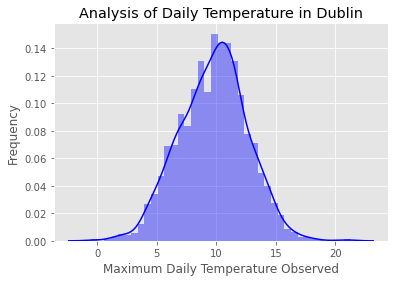

In [108]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv("dly532.csv", skiprows=25)
df['newdate'] = pd.to_datetime(df['date'])
df_hist = df[(pd.DatetimeIndex(df['newdate']).month == 3)]['maxtp'] #Adapted from (https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column)


temp_data = sns.distplot(df_hist, color = 'blue')
temp_data.set(xlabel="Maximum Daily Temperature Observed", ylabel = "Frequency", title="Analysis of Daily Temperature in Dublin")

plt.show()

Based on the above analysis, I generated the temperature using a normal distribution whereby:
1. the mean temperature data from the pandas dataframe loaded from Met Ireland. See cell below for calculation.
2. assumed a standard deviation of 3 (as conventional for a normal distribution)

In [2]:
# Generate a list of monthly averages from the data at :

weather_monthly_averages = []
for m in range(1, 13):
    weather_monthly_averages.append(int(round(df[(pd.DatetimeIndex(df['newdate']).month == m)]['maxtp'].mean(),0)))

print(weather_monthly_averages)


[8, 8, 10, 12, 15, 17, 19, 19, 17, 14, 10, 8]


### Average size of a house

Datatype: This is a numeric variable expressed in meteres squared.


TO DO - INCLUDE THE ANALYSIS FROM THE CSO ON THE AVERAGE SIZE OF A HOUSE - Including a reasonable mean and standard deviation
TO DO - Include the anlaysis on why a normal distribution is appropriate in this case. Also discuss the possibility of a pareto distribution

Table 11 - https://www.cso.ie/en/releasesandpublications/er/dber/domesticbuildingenergyratingsquarter32020/



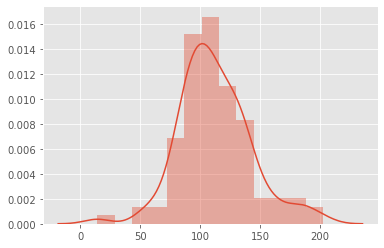

In [57]:
#Test to check whether the possion distribtion will generate data which reflects the size of a house

import numpy as np
rng = np.random.default_rng()
s = rng.normal(112, 30, 100)
import matplotlib.pyplot as plt
sns.distplot(s)
plt.show()

The follwing data was taken from the following website:

https://justinsighting.com/how-to-use-linear-regression-to-predict-housing-prices/

The dataset used has been taken from wiki.csc.calpoly.edu. The dataset is since no longer available from the original source, however I have used the dataset from the website above. I cannot be certain about the veracity of the dataset however for the purpose of finding out the type distribution I have deemed this to be appropriate.

I have analysed the data in the cell below:

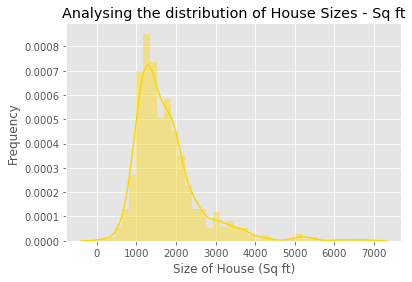

In [107]:
import pandas as pd
df_house = pd.read_csv("https://justinsighting.com/wp-content/uploads/2016/05/RealEstate.csv")

house_size = sns.distplot(df_house['Size'], color='gold')
house_size.set(xlabel="Size of House (Sq ft)", ylabel = "Frequency", title="Analysing the distribution of House Sizes - Sq ft")


plt.show()

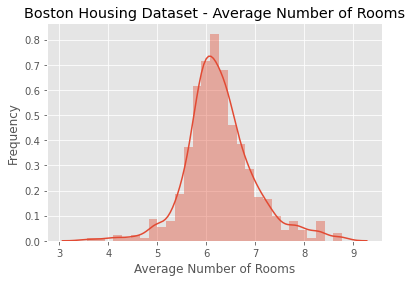

In [104]:
# Learnt to load the dataset from sklearn from the following website:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

from sklearn.datasets import load_boston

df1 = load_boston()
boston = pd.DataFrame(df1.data, columns=df1.feature_names)


room_nos_plot = sns.distplot(boston['RM'], kde=True)
room_nos_plot.set(xlabel="Average Number of Rooms", ylabel = "Frequency", title="Boston Housing Dataset - Average Number of Rooms")


plt.show()

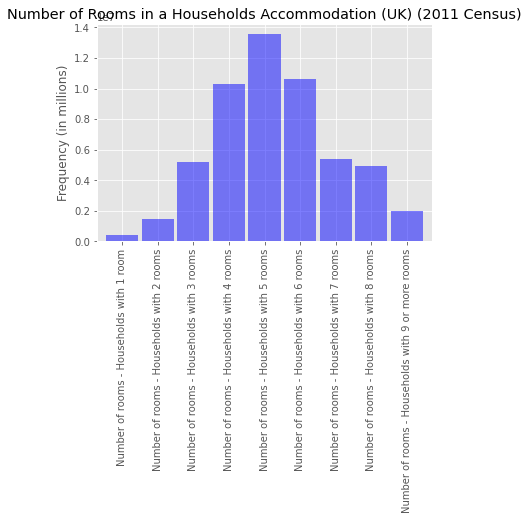

In [105]:
# Data from the 2011 Census released by the Office for National Statistics (ONS):
# Census: Household characteristics - rooms and bedrooms

# https://www.surreyi.gov.uk/dataset/2gdd0/census-household-characteristics-rooms-and-bedrooms

# This is the number of rooms in a household's accommodation.
# The definition of a room does not include bathrooms, toilets, halls or landings, or rooms that can only be used for storage. 
#  All other rooms, for example, kitchens, living rooms, bedrooms, utility rooms, studies and conservatories are counted.


df_rooms = pd.read_csv("https://www.surreyi.gov.uk/download/2gdd0/9vy/Number%20of%20rooms.csv")
df_rooms.drop(df_rooms.columns[[0,1,2,3,5,7,9,11,13,15,17,19,21]], axis=1, inplace=True)

df_rooms.loc['Total',:]= df_rooms.sum(axis=0)

plt.ylabel('Frequency (in millions)')

#Plotting rows by tranposing data in place - https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe:

df_rooms.T['Total'].plot.bar(title='Number of Rooms in a Households Accommodation (UK) (2011 Census)', width = 0.90, color = 'blue', alpha=0.5)


plt.show()
